In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import scipy.io
data = scipy.io.loadmat('digits.mat')

In [6]:
trainlabels = data['trainlabels']
testlabels = data['testlabels']
traindata = data['train']
testdata = data['test']

In [13]:
trainlabels = trainlabels.reshape(-1)
testlabels = testlabels.reshape(-1)

In [31]:
train_data_reshaped = []

for k in range(traindata.shape[1]):
    dummy = traindata[:, k]
    x = np.zeros((28, 28))
    for i in range(28):
        for j in range(28):
            x[i, j] = dummy[(i * 28) + j]
    
    train_data_reshaped.append(x.T)

train_data_reshaped = np.array(train_data_reshaped)
# print(train_data_reshaped)

In [32]:
train_data_reshaped.shape

(5000, 28, 28)

In [33]:
test_data_reshaped = []

for k in range(testdata.shape[1]):
    dummy = testdata[:, k]
    x = np.zeros((28, 28))
    for i in range(28):
        for j in range(28):
            x[i, j] = dummy[(i * 28) + j]
    
    test_data_reshaped.append(x.T)

test_data_reshaped = np.array(test_data_reshaped)

In [34]:
train_data_reshaped.shape

(5000, 28, 28)

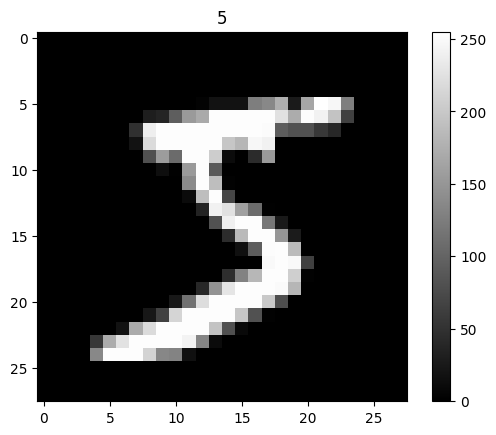

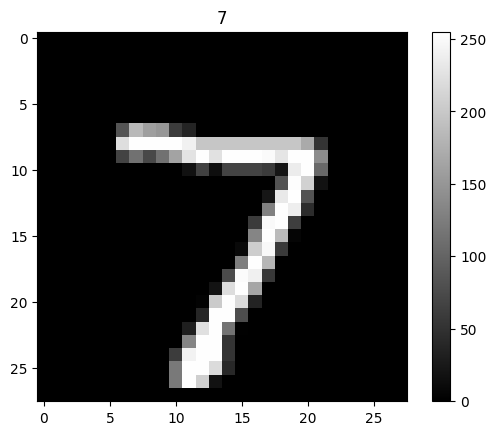

In [40]:
plt.imshow(train_data_reshaped[0], cmap='gray')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.title(trainlabels[0])
plt.show()



plt.imshow(test_data_reshaped[0], cmap='gray')
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')
plt.title(testlabels[0])
plt.show()

In [58]:
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.zeros(input_size)
        self.bias = 0.0
    
    def predict(self, x):
        return np.where(np.dot(x.flatten(), self.weights) + self.bias >= 0, 1, -1)
    
    def train(self, x, y, learning_rate=0.1, max_iterations=1000):
        errors_last_100 = []
        for iteration in range(max_iterations):
            errors = 0
            for i in range(len(x)):
                prediction = self.predict(x[i])
                if prediction != y[i]:
                    errors += 1
                    self.weights += learning_rate * y[i] * x[i].flatten()
                    self.bias += learning_rate * y[i]
            errors_last_100.append(errors)
            if len(errors_last_100) > 100:
                errors_last_100.pop(0)
            if errors == 0:
                print(f"Converged at iteration {iteration + 1}")
                break
            if iteration % 100 == 0:
                print(f"Iteration {iteration + 1}, Errors: {errors}")
            learning_rate /= (1 + iteration)
        return errors_last_100

x_train = train_data_reshaped
y_train = np.where(trainlabels == 0, 1, -1)

perceptron_0 = Perceptron(input_size=x_train[0].flatten().shape[0])
errors_last_100 = perceptron_0.train(x_train, y_train)

x_test = test_data_reshaped
y_test = np.where(testlabels == 0, 1, -1)

# Evaluate the perceptron on the test set
test_errors = 0
for i in range(len(x_test)):
    prediction = perceptron_0.predict(x_test[i])
    if prediction != y_test[i]:
        test_errors += 1

test_accuracy = 1 - (test_errors / len(x_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Iteration 1, Errors: 140
Iteration 101, Errors: 27
Iteration 201, Errors: 27
Iteration 301, Errors: 27
Iteration 401, Errors: 27
Iteration 501, Errors: 27
Iteration 601, Errors: 27
Iteration 701, Errors: 27
Iteration 801, Errors: 27
Iteration 901, Errors: 27
Test Accuracy: 98.40%


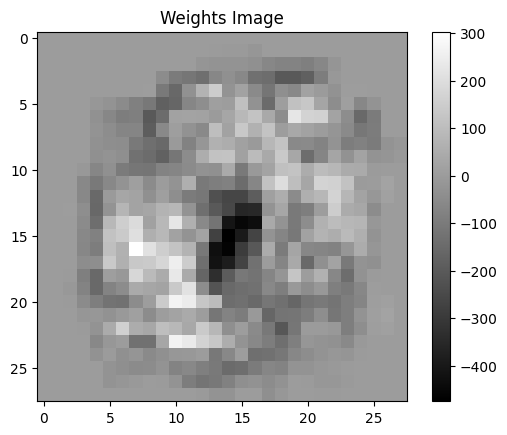

In [59]:
weights_image = perceptron_0.weights.reshape(28, 28)

# Plot the weights image
plt.imshow(weights_image, cmap='gray')
plt.title("Weights Image")
plt.colorbar()
plt.show()

The performance of the system seems to be improving as the number of errors decreases over iterations. Initially, there were 140 errors in the first iteration, but by the 100th iteration, the number of errors reduced to 27, and it remains constant thereafter. This indicates that the perceptron learned to distinguish between the digit '0' and other digits till 100 or 200th iteration, and the learning is saturated thereafter.

Also, the above image of weights vectors, looks like a zero. Each pixel in the weights image represents the weight associated with the corresponding pixel in the input image. Brighter pixels indicate higher weights, meaning they have a stronger influence on the perceptron's decision. The image (or W) represents the importance of each pixel in determining whether the input image is a '0' or not. Areas where the weights are higher indicate pixels that have a stronger influence on the classification decision.

In [54]:
x_train = train_data_reshaped
y_train = np.where(trainlabels == 8, 1, -1)

perceptron_8 = Perceptron(input_size=x_train[0].flatten().shape[0])
errors_last_100 = perceptron_8.train(x_train, y_train)

x_test = test_data_reshaped
y_test = np.where(testlabels == 8, 1, -1)
test_errors = 0
for i in range(len(x_test)):
    prediction = perceptron_8.predict(x_test[i])
    if prediction != y_test[i]:
        test_errors += 1

test_accuracy = 1 - (test_errors / len(x_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Iteration 1, Errors: 462
Iteration 101, Errors: 230
Iteration 201, Errors: 230
Iteration 301, Errors: 230
Iteration 401, Errors: 230
Iteration 501, Errors: 230
Iteration 601, Errors: 230
Iteration 701, Errors: 230
Iteration 801, Errors: 230
Iteration 901, Errors: 230
Test Accuracy: 91.80%


The perceptron performed worse than compared to 0. The reason can be because our perceptron failed to identify distinguishing features that can separate 8 from the rest.

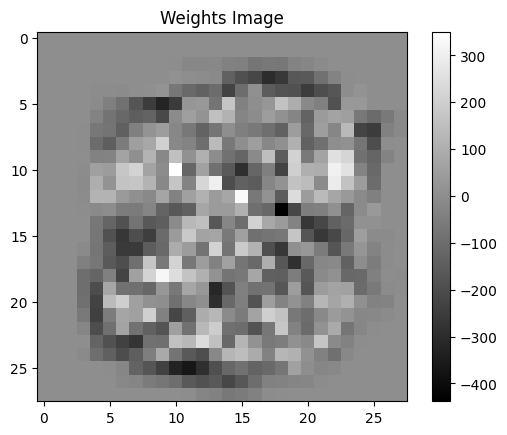

In [63]:
weights_image = perceptron_8.weights.reshape(28, 28)

# Plot the weights image
plt.imshow(weights_image, cmap='gray')
plt.title("Weights Image")
plt.colorbar()
plt.show()

In [55]:
x_train = train_data_reshaped
y_train = np.where(trainlabels == 1, 1, -1)

perceptron_1 = Perceptron(input_size=x_train[0].flatten().shape[0])
errors_last_100 = perceptron_1.train(x_train, y_train)

x_test = test_data_reshaped
y_test = np.where(testlabels == 1, 1, -1)
test_errors = 0
for i in range(len(x_test)):
    prediction = perceptron_1.predict(x_test[i])
    if prediction != y_test[i]:
        test_errors += 1

test_accuracy = 1 - (test_errors / len(x_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Iteration 1, Errors: 127
Iteration 101, Errors: 33
Iteration 201, Errors: 33
Iteration 301, Errors: 33
Iteration 401, Errors: 33
Iteration 501, Errors: 33
Iteration 601, Errors: 33
Iteration 701, Errors: 33
Iteration 801, Errors: 33
Iteration 901, Errors: 33
Test Accuracy: 99.00%


Performed better than that of detecting 0

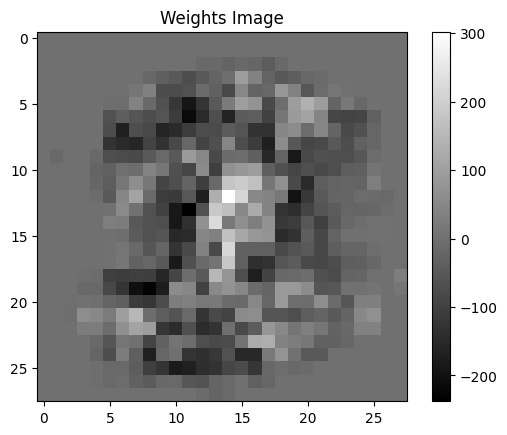

In [64]:
weights_image = perceptron_1.weights.reshape(28, 28)

# Plot the weights image
plt.imshow(weights_image, cmap='gray')
plt.title("Weights Image")
plt.colorbar()
plt.show()

In [65]:
x_train = train_data_reshaped
y_train = np.where(trainlabels == 2, 1, -1)

perceptron_2 = Perceptron(input_size=x_train[0].flatten().shape[0])
errors_last_100 = perceptron_2.train(x_train, y_train)

x_test = test_data_reshaped
y_test = np.where(testlabels == 2, 1, -1)

test_errors = 0
for i in range(len(x_test)):
    prediction = perceptron_2.predict(x_test[i])
    if prediction != y_test[i]:
        test_errors += 1

test_accuracy = 1 - (test_errors / len(x_test))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Iteration 1, Errors: 265
Iteration 101, Errors: 100
Iteration 201, Errors: 100
Iteration 301, Errors: 100
Iteration 401, Errors: 100
Iteration 501, Errors: 100
Iteration 601, Errors: 100
Iteration 701, Errors: 100
Iteration 801, Errors: 100
Iteration 901, Errors: 100
Test Accuracy: 96.80%


Performed poorer than detecting 0

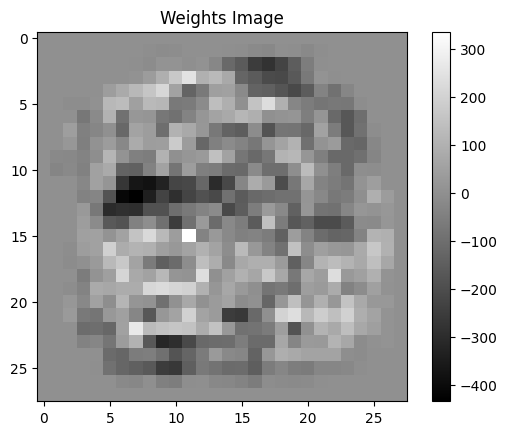

In [66]:
weights_image = perceptron_2.weights.reshape(28, 28)

# Plot the weights image
plt.imshow(weights_image, cmap='gray')
plt.title("Weights Image")
plt.colorbar()
plt.show()

In [89]:
def to_one_hot(labels, num_classes):
    num_samples = len(labels)
    one_hot_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        one_hot_labels[i, labels[i]] = 1
    return one_hot_labels

num_classes = 10
y_train_one_hot = to_one_hot(trainlabels, num_classes)
y_test_one_hot = to_one_hot(testlabels, num_classes)

In [107]:
import numpy as np

class TwoLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros(output_size)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def train(self, x, y, learning_rate=0.01, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            hidden_input = np.dot(x, self.weights_input_hidden) + self.bias_input_hidden
            hidden_output = self._sigmoid(hidden_input)
            output = np.dot(hidden_output, self.weights_hidden_output) + self.bias_hidden_output
            output = self._sigmoid(output)

            # Backpropagation
            grad_output = output - y
            grad_hidden_output = np.dot(grad_output, self.weights_hidden_output.T) * self._sigmoid_derivative(hidden_output)
            grad_weights_hidden_output = np.dot(hidden_output.T, grad_output)
            grad_weights_input_hidden = np.dot(x.T, grad_hidden_output)

            # Updating weights and biases
            self.weights_input_hidden -= learning_rate * grad_weights_input_hidden
            self.bias_input_hidden -= learning_rate * np.sum(grad_hidden_output, axis=0)
            self.weights_hidden_output -= learning_rate * grad_weights_hidden_output
            self.bias_hidden_output -= learning_rate * np.sum(grad_output, axis=0)
        print("Training completed.")
        
    def test(self, x_test, y_test):
        hidden_input = np.dot(x_test, self.weights_input_hidden) + self.bias_input_hidden
        hidden_output = self._sigmoid(hidden_input)
        output = np.dot(hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        output = self._sigmoid(output)
        
        predicted_labels = np.argmax(output, axis=1)
        true_labels = np.argmax(y_test, axis=1)
        
        accuracy = np.mean(predicted_labels == true_labels)
        return predicted_labels, accuracy
    
        
input_size = 784
hidden_size = 25
output_size = 10

perceptron = TwoLayerPerceptron(input_size, hidden_size, output_size)
perceptron.train(traindata.T, y_train_one_hot, learning_rate=0.001, epochs=500)

predicted_labels, test_accuracy = perceptron.test(testdata.T, y_test_one_hot)
print("Test Accuracy:", test_accuracy)

Training completed.
Test Accuracy: 0.778


In [108]:
print(predicted_labels)

[7 2 1 0 4 1 4 9 6 9 0 2 9 0 1 3 9 7 6 4 9 6 6 5 4 0 7 4 0 1 3 1 3 0 7 2 7
 1 2 1 1 7 9 2 3 5 1 2 9 4 6 8 5 8 2 0 4 1 4 4 7 8 9 8 9 4 2 4 3 0 7 0 2 7
 1 7 3 7 9 7 4 6 2 7 8 4 7 5 6 1 3 6 9 3 1 4 1 9 6 9 2 0 5 4 9 9 2 1 9 4 3
 1 3 9 9 4 4 4 4 9 5 4 7 6 4 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 9 1 8 2
 0 6 9 9 5 3 1 5 6 0 3 4 4 6 5 4 4 5 4 5 1 9 4 7 3 0 2 1 1 8 1 8 1 8 5 0 6
 4 2 3 0 1 1 1 0 9 0 5 1 6 9 2 3 6 1 1 1 3 9 5 2 9 4 5 9 1 9 0 3 8 7 3 7 2
 2 7 1 2 8 9 1 7 3 3 6 9 7 9 2 2 4 1 5 8 8 9 1 0 0 2 4 2 9 1 9 5 7 7 2 2 2
 0 8 5 7 7 1 1 6 1 2 0 5 0 1 4 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 9
 0 0 2 3 6 7 1 6 9 0 2 9 4 3 3 0 0 3 1 4 6 5 3 5 1 1 9 3 0 9 2 0 7 1 1 2 1
 5 3 3 2 7 5 6 2 4 1 3 8 1 0 5 1 9 1 5 0 6 1 8 5 1 7 9 4 6 3 2 5 0 4 3 6 3
 7 2 0 8 8 5 9 1 1 4 0 7 3 7 6 1 6 2 1 9 2 8 6 1 4 5 2 5 4 4 2 5 3 4 8 4 5
 0 3 1 7 7 3 7 9 7 1 9 2 1 4 2 9 2 0 6 9 1 4 8 1 8 9 8 9 8 8 3 7 6 0 0 3 8
 8 0 6 4 8 5 5 3 2 2 9 1 2 5 8 0 5 6 6 6 7 8 8 6 9 8 8 9 6 1 8 4 1 2 8 5 1
 9 7 5 4 0 9 9 9 1 0 5 2 

In [109]:
print(testlabels)

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8 4 7 1 2 4 0 2 7 4 3 3 0 0 3 1 9 6 5 2 5 9 2 9 3 0 4 2 0 7 1 1 2 1
 5 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 5 6 1 8 5 1 7 9 4 6 2 2 5 0 6 5 6 3
 7 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 8 6 1 9 5 2 5 4 4 2 8 3 8 2 4 5
 0 3 1 7 7 5 7 9 7 1 9 2 1 4 2 9 2 0 4 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0
 2 6 6 4 9 3 3 3 2 3 9 1 2 6 8 0 5 6 6 6 3 8 8 2 7 5 8 9 6 1 8 4 1 2 5 9 1
 9 7 5 4 0 8 9 9 1 0 5 2 